### Project 1: The Image Classifier Web App (CNNs)

#### Step 1: Import aLibraries

In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported successfully.")

Libraries imported successfully.


#### Step 2: Load and Prepare the CIFAR-10 Dataset

In [22]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Data loaded and preprocessed.")
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Data loaded and preprocessed.
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


#### Step 3: Data Visualization

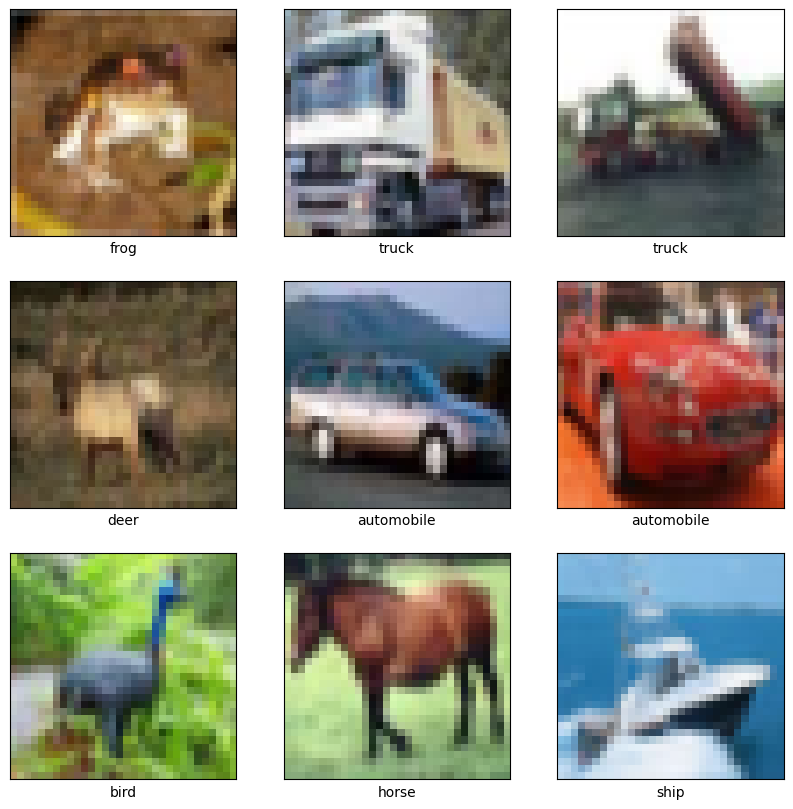

In [23]:
# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the first 9 images from the training set
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The y_train labels are one-hot encoded, so we need to find the index of the '1'
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

#### Step 4: Build the Convolutional Neural Network (CNN) Model

In [25]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25), # Dropout Layer

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25), # Dropout Layer

    # Flattening Layer
    Flatten(),

    # Dense Layers
    Dense(512, activation='relu'),
    Dropout(0.5), # Dropout Layer
    Dense(10, activation='softmax')
])

# Print the new summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

#### Step 5: Compile the Model

In [26]:
# --- Import tensorflow ---
import tensorflow as tf

# --- Compile the model ---
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

print("Model compiled successfully.")

Model compiled successfully.


#### Step 6: Train the Model

In [27]:
# Train for a few epochs to let the new classifier head learn
history = model.fit(x_train, y_train, epochs=40, validation_split=0.2)
print("Training finished.")

Epoch 1/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 0.3146 - loss: 1.8354 - val_accuracy: 0.5605 - val_loss: 1.2297
Epoch 2/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.5515 - loss: 1.2556 - val_accuracy: 0.6385 - val_loss: 1.0287
Epoch 3/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.6213 - loss: 1.0644 - val_accuracy: 0.6811 - val_loss: 0.9013
Epoch 4/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.6690 - loss: 0.9309 - val_accuracy: 0.7071 - val_loss: 0.8264
Epoch 5/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.7010 - loss: 0.8515 - val_accuracy: 0.7206 - val_loss: 0.7959
Epoch 6/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.7120 - loss: 0.8204 - val_accuracy: 0.7265 - val_loss: 0.7763
Epoch 7/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.7297 - loss: 0.7699 - val_accuracy: 0.7374 - val_loss: 0.7513
Epoch 8/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.7452 -

#### Step 7: Evaluate the Model

In [28]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(f"\\nTest accuracy: {test_acc*100:.2f}%")

313/313 - 3s - 11ms/step - accuracy: 0.7796 - loss: 0.7337
\nTest accuracy: 77.96%


#### Step 8: Save Your Trained Model

In [29]:
# Save the entire model to a HDF5 file.
model.save('cifar10_model.keras')

print("Model saved successfully to cifar10_model.keras")

Model saved successfully to cifar10_model.keras
